In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

# Dataset 

In [2]:
df = pd.read_csv("deps/T2_points.csv", header=None)
df.columns = ["x", "y"]

In [3]:
df.head()

,x,y
0,-86.6883,32.3824
1,-86.6024,32.4037
2,-86.7936,32.3482
3,-86.5867,32.3832
4,-86.7650,32.4714


In [4]:
x_max = df.max()['x']
y_max = df.max()['y']

x_min = df.min()['x']
y_min = df.min()['y']

x_center = (x_max - x_min)/2 + x_min
y_center = (y_max - y_min)/2 + y_min

print(f"x_min: {x_min}, x_max: {x_max}, x_center: {x_center}")
print(f"y_min: {y_min}, y_max: {y_max}, y_center: {y_center}")

x_min: -124.7595, x_max: -66.9875, x_center: -95.8735
y_min: 24.5219, y_max: 49.1668, y_center: 36.84435


In [5]:
sample = df.sample(100_000)

# PCA tranform
pca = PCA()
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=["x", "y"])
sample_pca = pd.DataFrame(pca.transform(sample), columns=["x", "y"])

# PCA components ≈ Identity 
print("PCA components:\n", pca.components_)
print("PCA explained variance ratio:\n", pca.explained_variance_ratio_)

# 45-degree rotation
theta = np.deg2rad(45)
rotation_45 = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])


df_rotated_45 = pd.DataFrame(df_pca.to_numpy() @ rotation_45.T, columns=["x", "y"])
sample_rotated = pd.DataFrame(sample_pca.to_numpy() @ rotation_45.T, columns=["x", "y"])

PCA components:
 [[ 0.99875331 -0.04991821]
 [ 0.04991821  0.99875331]]
PCA explained variance ratio:
 [0.80194064 0.19805936]


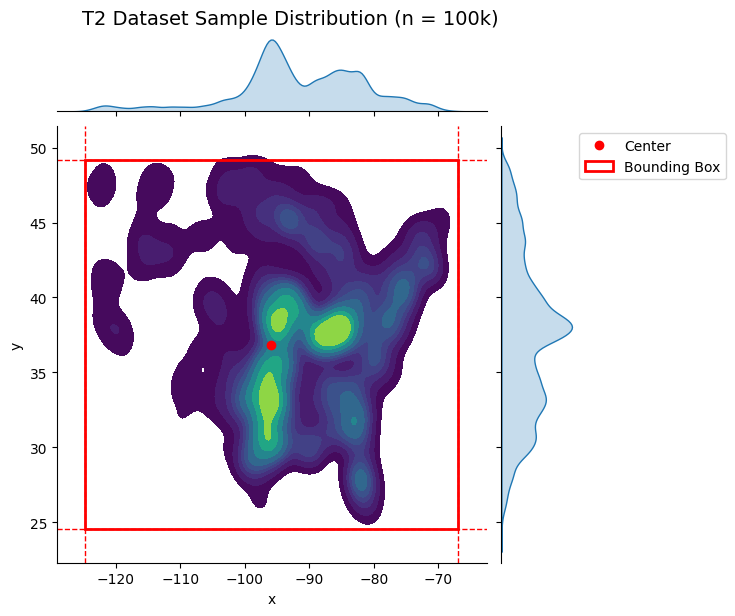

In [6]:
g = sns.jointplot(data=sample, x='x', y='y', kind='kde', fill=True, cmap="viridis")

ax = g.ax_joint
ax.plot(x_center, y_center, 'ro', label='Center')

rect = plt.Rectangle(
    (x_min, y_min),
    x_max - x_min,
    y_max - y_min,
    linewidth=2,
    edgecolor='red',
    facecolor='none',
    label='Bounding Box'
)
ax.add_patch(rect)

ax.axvline(x_min, color='red', linestyle='--', linewidth=1)
ax.axvline(x_max, color='red', linestyle='--', linewidth=1)
ax.axhline(y_min, color='red', linestyle='--', linewidth=1)
ax.axhline(y_max, color='red', linestyle='--', linewidth=1)

plt.suptitle("T2 Dataset Sample Distribution (n = 100k)", fontsize=14,y = 1.02)
ax.legend(bbox_to_anchor=(1.2, 1))
# plt.savefig("plots/T2_sample_dist.png", bbox_inches="tight")
plt.show()

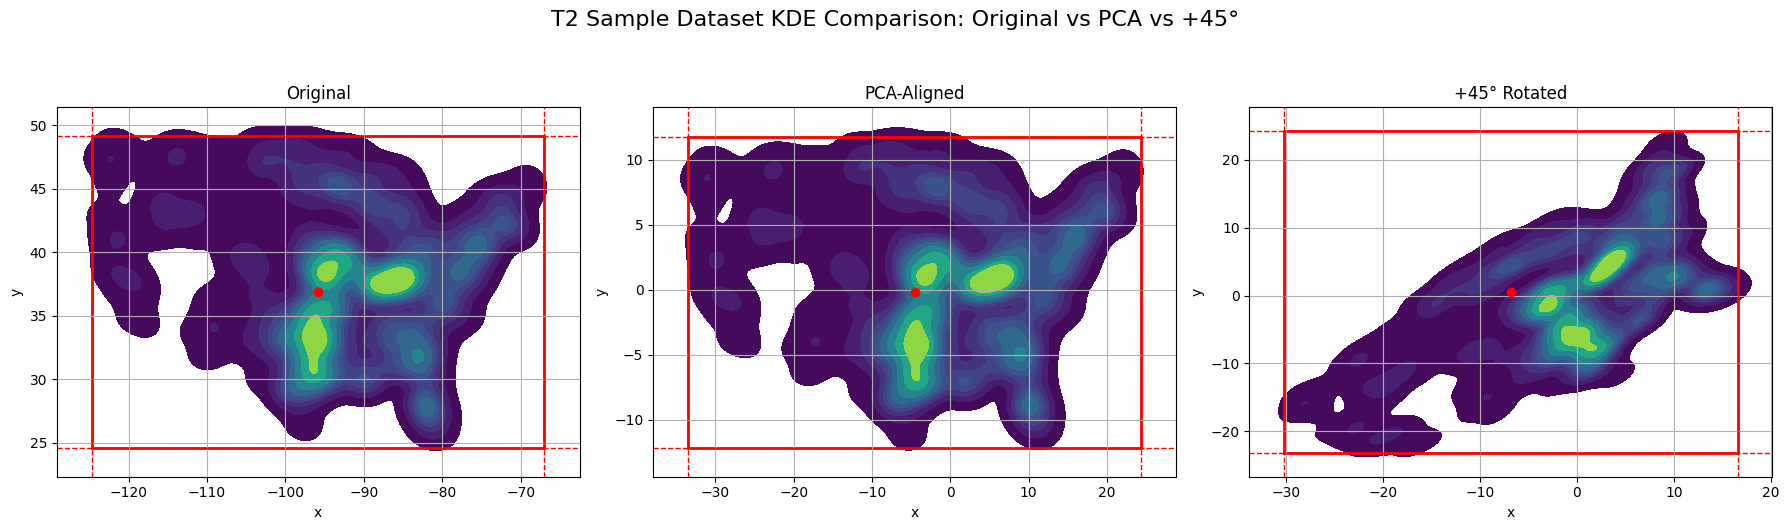

In [7]:
# Δεδομένα για plots οπως το προηγούμενο
## Πα΄ίρνει μερικά λεπτά

datasets = [
    ("Original", sample),
    ("PCA-Aligned", sample_pca),
    ("+45° Rotated", sample_rotated),
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (title, data) in zip(axes, datasets):
    sns.kdeplot(data=data, x="x", y="y", fill=True, cmap="viridis", ax=ax, thresh=0.01)

    x_min, x_max = data["x"].min(), data["x"].max()
    y_min, y_max = data["y"].min(), data["y"].max()
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2

    ax.plot(x_center, y_center, 'ro')

    rect = plt.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    ax.axvline(x_min, color='red', linestyle='--', linewidth=1)
    ax.axvline(x_max, color='red', linestyle='--', linewidth=1)
    ax.axhline(y_min, color='red', linestyle='--', linewidth=1)
    ax.axhline(y_max, color='red', linestyle='--', linewidth=1)

    ax.set_title(f"{title}", fontsize=12)
    ax.grid()

plt.suptitle("T2 Sample Dataset KDE Comparison: Original vs PCA vs +45°", fontsize=16, y=1.05)
plt.tight_layout()
# plt.savefig("plots/T2_comparison.png", bbox_inches="tight")
plt.show()

# Points

In [8]:
points_001 = pd.read_csv("deps/USA_c0.01%_n10000_p.csv", header=None, names=["x", "y"])
points_001_pca =  pd.DataFrame(pca.transform(points_001), columns=["x", "y"])
points_001_rotated = pd.DataFrame(points_001_pca.to_numpy() @ rotation_45.T, columns=["x", "y"])

In [22]:
points_001.head()

,x,y
0,-102.36200,45.64965
1,-82.15970,39.01165
2,-109.52000,38.43120
3,-89.06465,36.96315
4,-95.04865,42.10660


In [9]:
points_1 = pd.read_csv("deps/USA_c1%_n10000_p.csv", header=None, names=["x", "y"])
points_1_pca =  pd.DataFrame(pca.transform(points_1), columns=["x", "y"])
points_1_rotated = pd.DataFrame(points_1_pca.to_numpy() @ rotation_45.T, columns=["x", "y"])

In [23]:
points_1.head()

,x,y
0,-99.97995,39.78800
1,-94.73040,44.55085
2,-83.97090,38.51550
3,-114.74400,38.26945
4,-93.26305,43.41565


Text(0.5, 1.2, 'Query 0.01% Distribution')

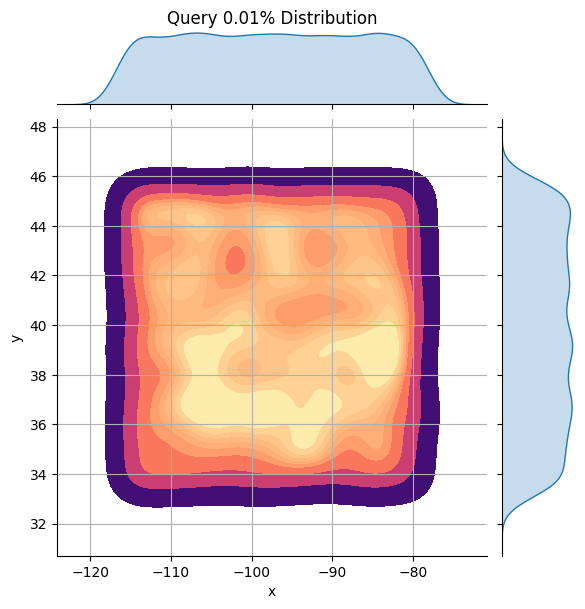

In [10]:
sns.jointplot(data=points_001, x='x', y='y', kind='kde', fill=True, cmap="magma")
plt.grid()
plt.title("Query 0.01% Distribution", y = 1.2)
# plt.savefig("plots/Query_points_dist001.png", bbox_inches="tight")

Text(0.5, 1.2, 'Query 1% Distribution')

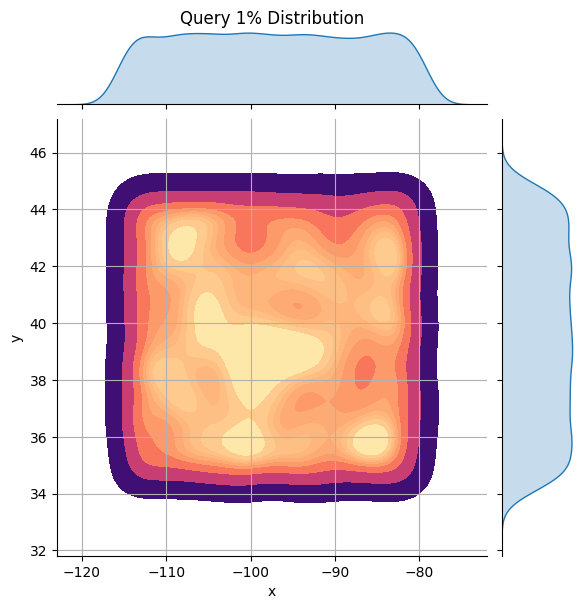

In [11]:
sns.jointplot(data=points_1, x='x', y='y', kind='kde', fill=True, cmap="magma")
plt.grid()
plt.title("Query 1% Distribution", y = 1.2)
# plt.savefig("plots/Query_points_dist1.png", bbox_inches="tight")

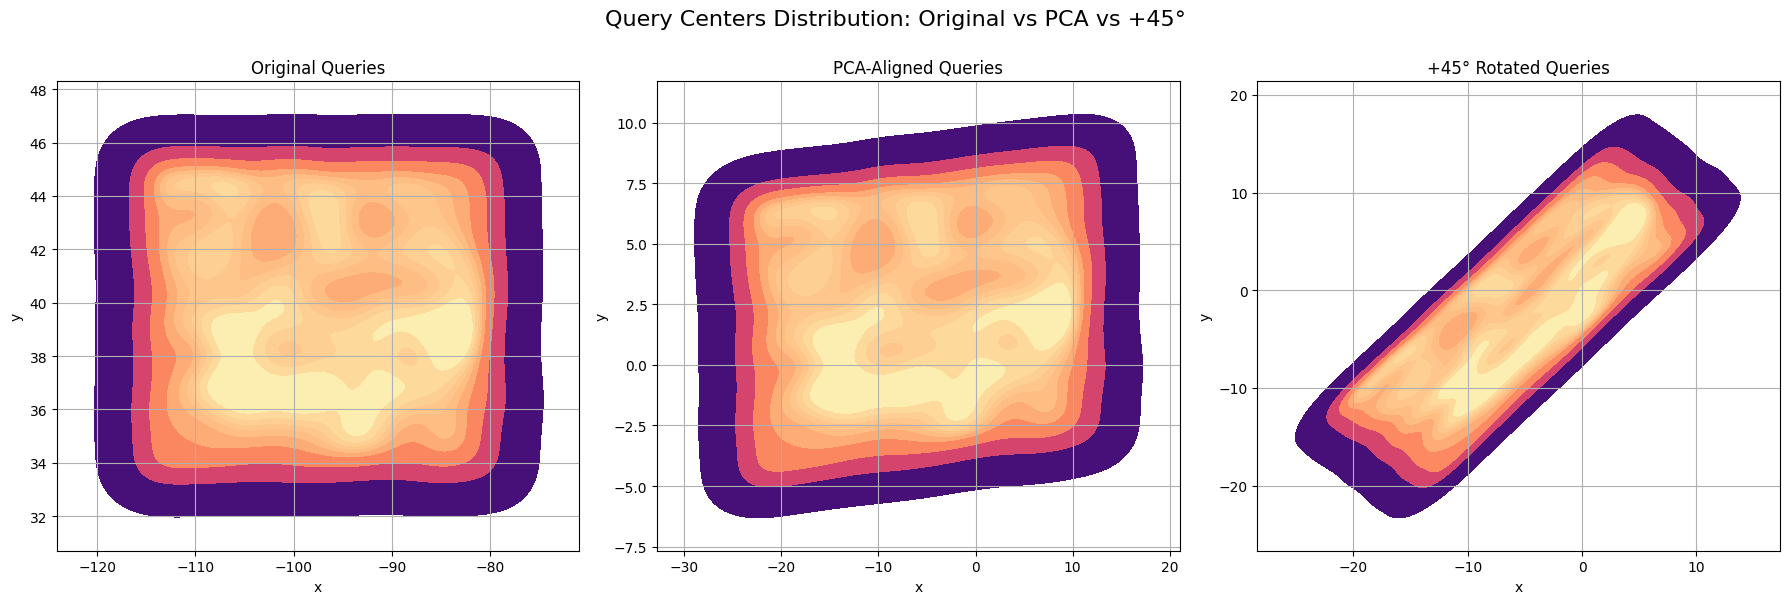

In [12]:
query_datasets = [
    ("Original Queries", points_001),
    ("PCA-Aligned Queries", points_001_pca),
    ("+45° Rotated Queries", points_001_rotated),
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, data) in zip(axes, query_datasets):
    sns.kdeplot(data=data, x="x", y="y", fill=True, cmap="magma", ax=ax, thresh=0.01)
    ax.set_title(title, fontsize=12)
    ax.grid()

plt.suptitle("Query Centers Distribution: Original vs PCA vs +45°", fontsize=16, y=1.0)
plt.tight_layout()
# plt.savefig("plots/Query_comp.png", bbox_inches="tight")
plt.show()

# Points vs Dataset

In [13]:
query_n_samples = 100
n_samples = 10_000

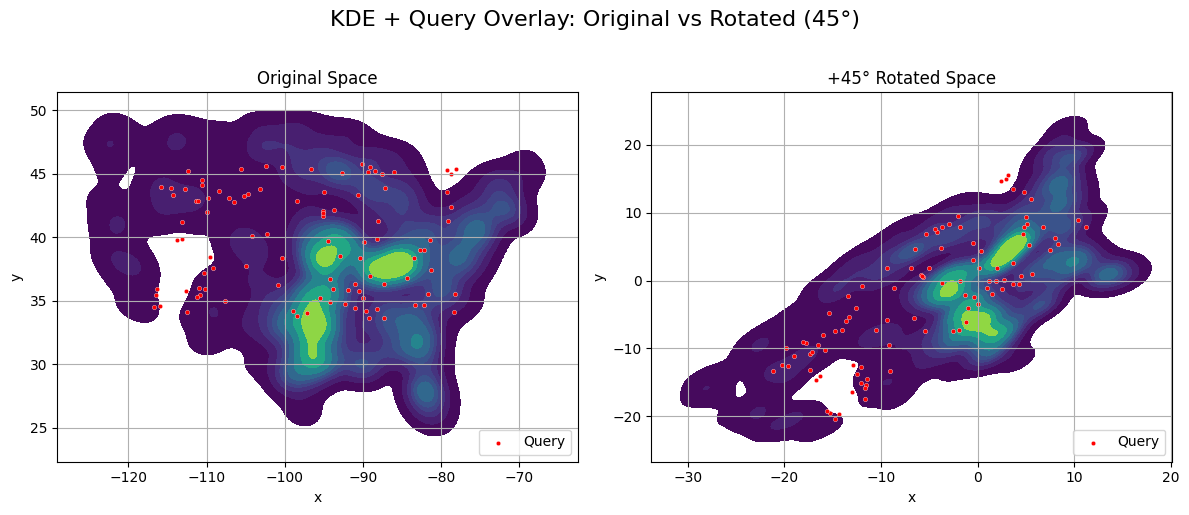

In [14]:
query_sample_original = points_001.iloc[:query_n_samples]
query_sample_rotated = points_001_rotated.iloc[:query_n_samples]

datasets = [
    ("Original Space", sample, query_sample_original),
    ("+45° Rotated Space", sample_rotated, query_sample_rotated),
]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, (title, data, queries) in zip(axes, datasets):
    sns.kdeplot(data=data, x="x", y="y", fill=True, cmap="viridis", ax=ax, thresh=0.01)

    sns.scatterplot(data=queries, x="x", y="y", color="red", s=10, ax=ax, label="Query")

    ax.set_title(title, fontsize=12)
    ax.legend(loc="lower right")
    ax.grid()

plt.suptitle("KDE + Query Overlay: Original vs Rotated (45°)", fontsize=16, y=1.02)
plt.tight_layout()
# plt.savefig("plots/T2_data_vs_rotated_with_queries.png", bbox_inches="tight")
plt.show()

In [15]:
# points_rotated.to_csv("data/USA_queries/queries_0.01%_rotated.csv", index=False, header=False)
# df_rotated_45.to_csv("data/T2_rotated.csv", index=False, header=False)

In [16]:
# for i in range(0,91):
#     theta = np.deg2rad(i)
#     rotation = np.array([
#         [np.cos(theta), -np.sin(theta)],
#         [np.sin(theta),  np.cos(theta)]
#     ])
#     df_rotated = pd.DataFrame(df_pca.to_numpy() @ rotation.T, columns=["x", "y"])
#     points_rotated = pd.DataFrame(points_pca.to_numpy() @ rotation.T, columns=["x", "y"])
#     df_rotated.to_csv(f"data/rotations/T2_{i}.csv", index=False, header=False)
#     points_rotated.to_csv(f"data/rotations/queries_{i}.csv", index=False, header=False)

In [17]:
x_max = df_rotated_45.max()['x']
y_max = df_rotated_45.max()['y']

x_min = df_rotated_45.min()['x']
y_min = df_rotated_45.min()['y']

x_center = (x_max - x_min)/2 + x_min
y_center = (y_max - y_min)/2 + y_min

print(f"x_min: {x_min}, x_max: {x_max}, x_center: {x_center}")
print(f"y_min: {y_min}, y_max: {y_max}, y_center: {y_center}")

x_min: -30.523345322495818, x_max: 16.56376219226369, x_center: -6.979791565116063
y_min: -23.397914131911488, y_max: 24.34399565527712, y_center: 0.47304076168281384


# Rectangles

In [18]:
rectangles_big = pd.read_csv("deps/USA_c1%_n10000_r.csv", header=None, names=["x", "y", "w", "h"])
rectangles_low = pd.read_csv("deps/USA_c0.01%_n10000_r.csv", header=None, names=["x", "y", "w", "h"])

In [24]:
rectangles_big.head()

,x,y,w,h
0,-99.97995,39.78800,2.0741,2.4440
1,-94.73040,44.55085,2.0240,2.5049
2,-83.97090,38.51550,2.5188,2.0128
3,-114.74400,38.26945,1.8200,2.7861
4,-93.26305,43.41565,3.0203,1.6787


In [25]:
rectangles_low.head()

,x,y,w,h
0,-102.36200,45.64965,0.2940,0.1725
1,-82.15970,39.01165,0.1596,0.3177
2,-109.52000,38.43120,0.1720,0.2960
3,-89.06465,36.96315,0.2563,0.1979
4,-95.04865,42.10660,0.1851,0.2738


Text(0.5, 0.98, 'Areas of the Query Rectangles')

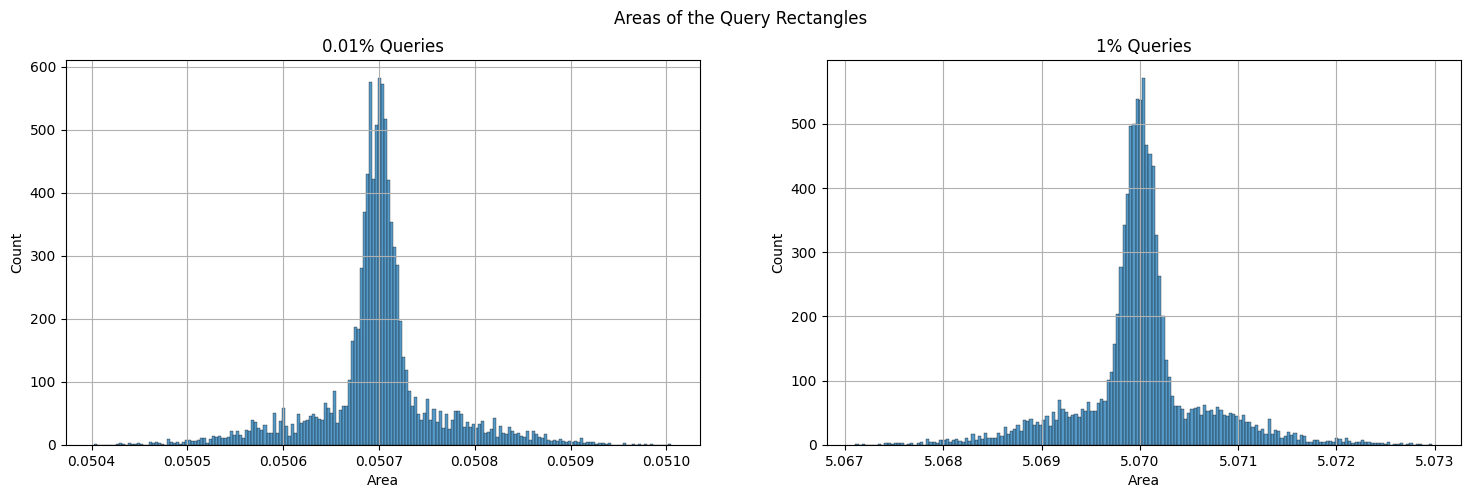

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
sns.histplot(rectangles_low['w'] * rectangles_low['h'], ax=ax1)
ax1.set_title("0.01% Queries")
ax1.set_xlabel("Area")
ax1.grid()

sns.histplot(rectangles_big['w'] * rectangles_big['h'], ax=ax2)
ax2.set_title("1% Queries")
ax2.set_xlabel("Area")

ax2.grid()
plt.suptitle("Areas of the Query Rectangles")
# plt.savefig("plots/Query_rects_dist.png", bbox_inches="tight")

Text(0.5, 0.98, 'Height and Width Distributions of 1% Queries')

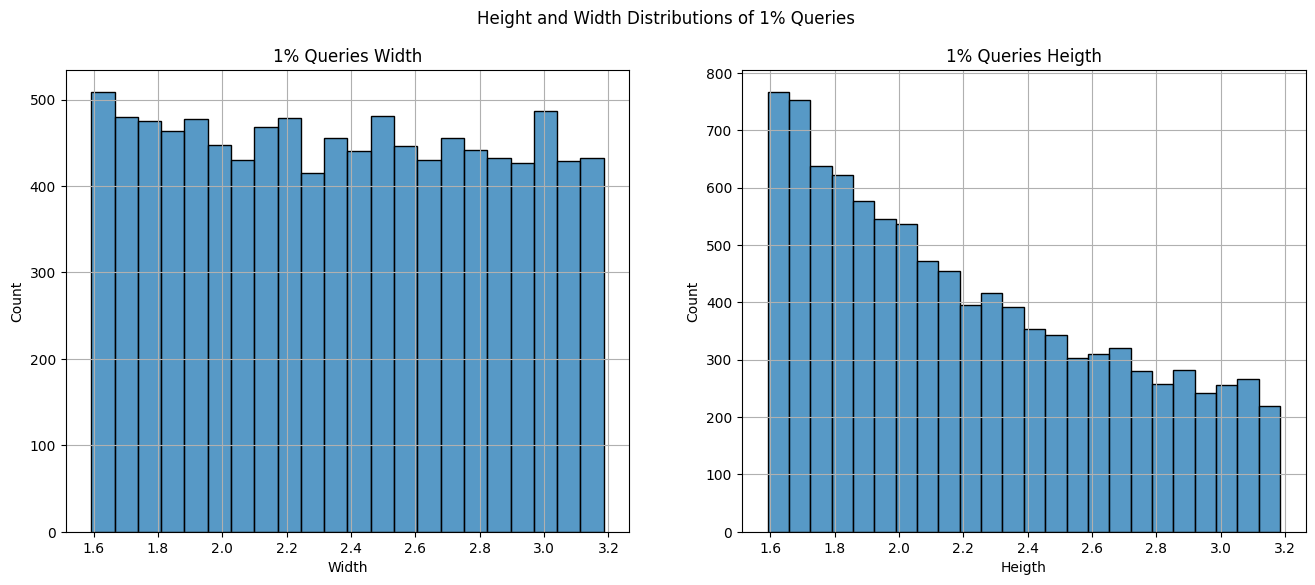

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
sns.histplot(rectangles_big['w'], ax=ax1)
ax1.set_title("1% Queries Width")
ax1.set_xlabel("Width")

ax1.grid()

sns.histplot(rectangles_big['h'], ax=ax2)
ax2.set_title("1% Queries Heigth")
ax2.set_xlabel("Heigth")

ax2.grid()
plt.suptitle("Height and Width Distributions of 1% Queries")
# plt.savefig("plots/Query_rects_hw_dist.png", bbox_inches="tight")

Text(0.5, 0.98, 'Dimensions of the Query Rectangles')

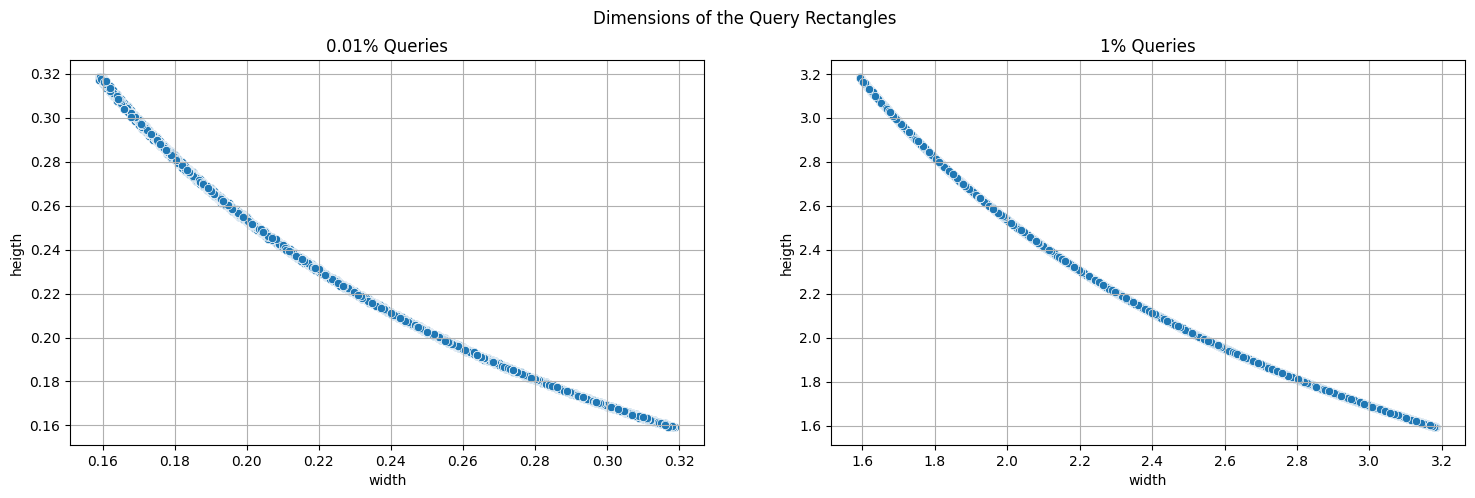

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
sns.scatterplot(data = rectangles_low, x = 'w', y = 'h', ax=ax1)
ax1.set_title("0.01% Queries")
ax1.set_xlabel("width")
ax1.set_ylabel("heigth")
ax1.grid()

sns.scatterplot(data = rectangles_big, x= 'w', y = 'h', ax=ax2)
ax2.set_title("1% Queries")
ax2.set_xlabel("width")
ax2.set_ylabel("heigth")
ax2.grid()
plt.suptitle("Dimensions of the Query Rectangles")
# plt.savefig("plots/Query_rects_dims.png", bbox_inches="tight")